# LAB 05 | Detekcija objekata i obrada slike

## License Plate Blurring
## Zamagljivanje/Cenzurisanje registarskih tablica

Korištenjem Haar Cascades agoritma, kreirati python program za zamagljivanje registarskih tablica otkrivenih na slici!

Koristiti pretrenirani model tj. .xml fajl identično kao kroz postupak koji smo koristili za detekciju lica (nažalost, predefinirani XML vrijedi samo za RUSKE tablice!)

----
Upotrijebite sliku u folderu pod nazivom car_plate.jpg i kreirajte funkciju koja će zamutiti sliku registarske tablice. Provjerite folder za ispravnu Haar Cascades pretreniranu .xml datoteku koju trebate koristiti.

Slijedite i dovršite zadatke u nastavku kako biste završili zadatak!

**ZADATAK 1: Import uobičajnih biblioteka koje nam trebaju za kreiranje rješenja.**

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**ZADATAK 2: Učitati car_plate.jpg file.**

In [11]:
slika = cv2.imread("car_plate.jpg")

**ZADATAK 3: Kreirati funkciju koja će prikazati sliku u većoj rezoluciji i ispravnim kolor mapiranjem za matplotlib.**

In [12]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    slika_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(slika_rgb,cmap=cmap)

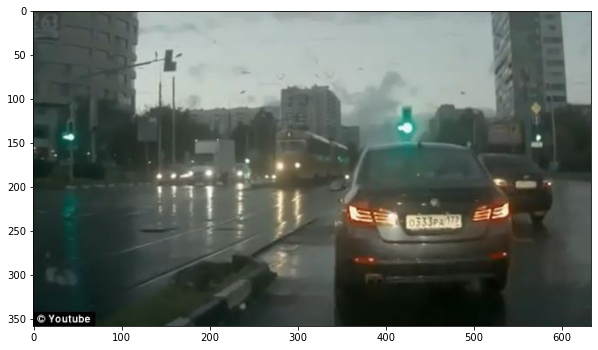

In [13]:
display(slika)

**ZADATAK 4: Učitati haarcascade_russian_plate_number.xml file.**

In [14]:
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

**ZADATAK 5: Kreirajte funkciju koja uzima sliku i crta pravougaonik oko onoga što detektuje da je registarska tablica. Podesite scaleFactor i minNeighbor parametre da biste dobili dobre rezultate.**

In [15]:
def detect_plate(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.2, minNeighbors=5)
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,255,0), 5) 
    return plate_img  

In [16]:
result = detect_plate(slika)

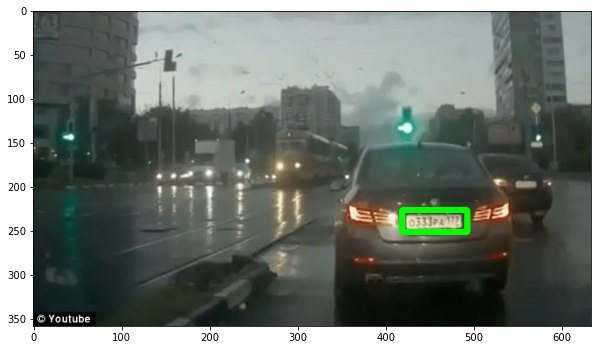

In [17]:
display(result)

**ZAVRŠNI ZADATAK: Izmjenite funkciju tako da efektivno zamagljuje otkrivenu registarsku tablicu, umjesto da samo nacrta pravougaonik oko nje.:**

1. Najteži dio je pretvoriti (x,y,w,h) informacije u vrijednosti dimenzije koje su vam potrebne da biste uhvatili ROI (nešto što smo obradili u predavanju 01-Blending-and-Pasting-Images. 
Pomoć: https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python
Potrebno je pretvoriti informacije o gornjem lijevom uglu pravougaonika i širini i visinu, u vrijednosti pozicije indeksiranja.

2. Nakon što ste definirali ROI koristeći vraćene vrijednosti (x,y,w,h), treba zamagliti/blurati ROI.
Za ovo možete koristiti cv2.medianBlur.

3. Sada kada imate zamućenu verziju ROI (registarske tablice), treba zalepite ovu zamućenu sliku nazad na originalnu sliku na istoj originalnoj lokaciji. 
Koristiti Numpy indeksiranje i sjećenje (slicing) za PASTE zamućenog ROI područja na originalnu slik

In [30]:
def detect_and_blur_plate(img):
    plate_img = img.copy()
    plate = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.2, minNeighbors=5)
    for (x,y,w,h) in plate_rects:
        plate = plate[y:y+h, x:x+w]
        blurred_plate = cv2.medianBlur(plate, 11)
        plate_img[y:y+h, x:x+w] = blurred_plate
    return plate_img

In [31]:
result = detect_and_blur_plate(slika)

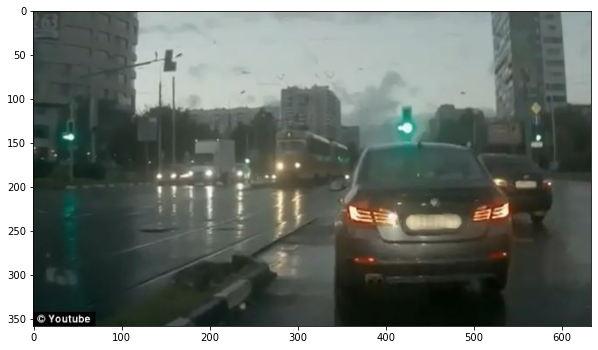

In [32]:
display(result)